# 資料匯入

In [1]:
import pandas as pd
df = pd.read_csv("Wine.csv",encoding = "big5")
df.head()

,酒精,蘋果酸,灰燼,灰燼的鹼度,鎂,總酚,黃烷類,Nonflavanoid酚,前花青素,顏色強度,顏色,OD280/OD315被稀釋的酒,脯氨酸,顧客區隔
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [2]:
X = df.drop('顧客區隔',axis=1)
y = df['顧客區隔']

In [3]:
# 把DataFrame加上highlight背景色
def highlight_highcorr(s):
    is_high = ((s >= 0.6) & (s < 1)) #Series condition setting
    return ['background-color: Yellow' if v else '' for v in is_high]

In [4]:
X.corr().round(3).style.apply(highlight_highcorr)

,酒精,蘋果酸,灰燼,灰燼的鹼度,鎂,總酚,黃烷類,Nonflavanoid酚,前花青素,顏色強度,顏色,OD280/OD315被稀釋的酒,脯氨酸
酒精,1,0.094,0.212,-0.31,0.271,0.289,0.237,-0.156,0.137,0.546,-0.072,0.072,0.644
蘋果酸,0.094,1,0.164,0.289,-0.055,-0.335,-0.411,0.293,-0.221,0.249,-0.561,-0.369,-0.192
灰燼,0.212,0.164,1,0.443,0.287,0.129,0.115,0.186,0.01,0.259,-0.075,0.004,0.224
灰燼的鹼度,-0.31,0.289,0.443,1,-0.083,-0.321,-0.351,0.362,-0.197,0.019,-0.274,-0.277,-0.441
鎂,0.271,-0.055,0.287,-0.083,1,0.214,0.196,-0.256,0.236,0.2,0.055,0.066,0.393
總酚,0.289,-0.335,0.129,-0.321,0.214,1,0.865,-0.45,0.612,-0.055,0.434,0.7,0.498
黃烷類,0.237,-0.411,0.115,-0.351,0.196,0.865,1,-0.538,0.653,-0.172,0.543,0.787,0.494
Nonflavanoid酚,-0.156,0.293,0.186,0.362,-0.256,-0.45,-0.538,1,-0.366,0.139,-0.263,-0.503,-0.311
前花青素,0.137,-0.221,0.01,-0.197,0.236,0.612,0.653,-0.366,1,-0.025,0.296,0.519,0.33
顏色強度,0.546,0.249,0.259,0.019,0.2,-0.055,-0.172,0.139,-0.025,1,-0.522,-0.429,0.316


In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### PCA (n=13)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
%matplotlib inline

pca = decomposition.PCA(n_components=None) # n=13
pca.fit(X_train)
X = pca.transform(X_train)
X_train

array([[ 0.87668336,  0.79842885,  0.64412971, ...,  0.0290166 ,
        -1.06412236, -0.2059076 ],
       [-0.36659076, -0.7581304 , -0.39779858, ...,  0.0290166 ,
        -0.73083231, -0.81704676],
       [-1.69689407, -0.34424759, -0.32337513, ...,  0.90197362,
         0.51900537, -1.31256499],
       ...,
       [-0.70227477, -0.68615078, -0.65828065, ...,  0.46549511,
         0.51900537, -1.31256499],
       [ 1.13777093, -0.62316862, -0.91876272, ..., -0.18922266,
         1.03282752,  0.80164614],
       [ 1.4610222 ,  0.12361993,  0.42085937, ..., -1.45501034,
        -1.2168803 , -0.2719767 ]])

### 解釋共變異數比率

In [7]:
pca.explained_variance_ratio_

array([0.36884109, 0.19318394, 0.10752862, 0.07421996, 0.06245904,
       0.04909   , 0.04117287, 0.02495984, 0.02308855, 0.01864124,
       0.01731766, 0.01252785, 0.00696933])

In [8]:
def accumulate(x):
    p = []
    for i in range(len(x)):
        if(i==0):
            p.append(x[i])
        else:
            p.append(p[i-1]+x[i])
    return p

In [9]:
p_accu = accumulate(pca.explained_variance_ratio_)
p_accu

[0.3688410929485785,
 0.562025035922731,
 0.6695536580024909,
 0.7437736198693176,
 0.8062326588339482,
 0.8553226637620309,
 0.896495537049806,
 0.9214553746207984,
 0.9445439244060695,
 0.963185159581166,
 0.9805028244247825,
 0.9930306714706727,
 1.0]

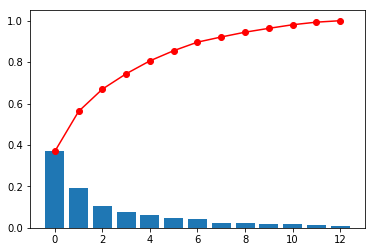

In [10]:
y1 = pca.explained_variance_ratio_
y2 = accumulate(pca.explained_variance_ratio_)
x = [i for i in range(len(y1))]

plt.figure()
plt.bar(x,y1,align='center')
plt.plot(x, y2, 'r-o')

plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
# 把類別轉成0,1,2，散佈圖上色用
le = LabelEncoder()
le.fit(['1', '2', '3'])
y_label = le.transform(y_train)

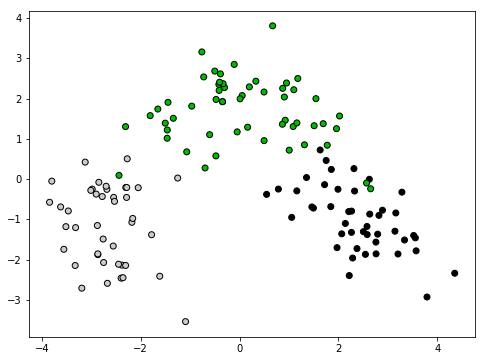

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_label, cmap=plt.cm.spectral, edgecolor='k') 
# 若無法work, 可修改其中cmap=plt.cm.get_cmap("Spectral")
plt.show()

# PCA (n=2) - 將13個特徵值轉降成2個

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
%matplotlib inline

pca = decomposition.PCA(n_components=2)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_train

array([[-2.17884511e+00, -1.07218467e+00],
       [-1.80819239e+00,  1.57822344e+00],
       [ 1.09829474e+00,  2.22124345e+00],
       [-2.55584748e+00, -1.66210369e+00],
       [ 1.85698063e+00,  2.41573166e-01],
       [ 2.58288576e+00, -1.37668170e+00],
       [ 8.72876119e-01,  2.25618512e+00],
       [-4.18384029e-01,  2.35415681e+00],
       [-3.04977245e-01,  2.27659433e+00],
       [ 2.14082532e+00, -1.10052871e+00],
       [-2.98136465e+00, -2.47159183e-01],
       [ 1.96188242e+00,  1.25407738e+00],
       [-2.16177795e+00, -9.75966550e-01],
       [ 2.21976084e+00, -2.39507167e+00],
       [-2.30179529e+00, -2.05791962e-01],
       [-3.00953827e+00, -2.79141212e-01],
       [ 2.63443473e+00, -8.68313119e-01],
       [-1.09219965e+00, -3.53906625e+00],
       [ 2.62578435e+00, -2.96852840e-03],
       [ 1.98077342e-01,  2.29193443e+00],
       [-2.67442753e+00, -2.58800132e+00],
       [-2.54763698e+00, -4.52703891e-01],
       [ 1.77416736e+00,  8.43586940e-01],
       [-2.

In [14]:
pca.explained_variance_ratio_

array([0.36884109, 0.19318394])

In [15]:
pd.DataFrame(X_train).corr()

,0,1
0,1.000000e+00,-6.578944e-16
1,-6.578944e-16,1.000000e+00


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['1', '2', '3'])
y_label = le.transform(y_train)

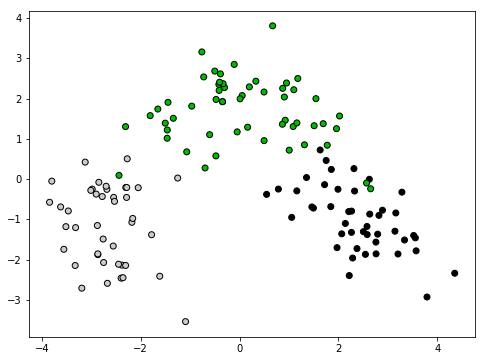

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_label, cmap=plt.cm.spectral, edgecolor='k')
plt.show()

## LogisticRegression (使用2個components)

In [18]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("Wine.csv",encoding = "big5")
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)




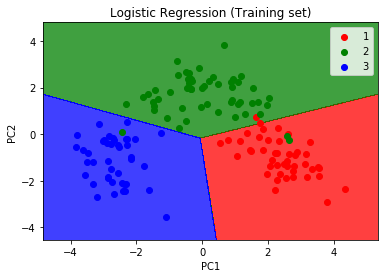

In [19]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


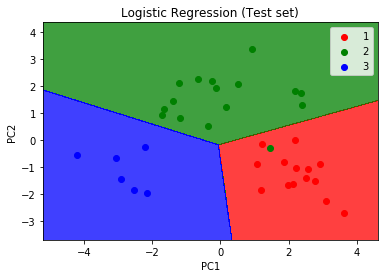

In [20]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()